In [1]:
import tensorflow as tf
from tensorflow import keras


In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [6]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 157s 14us/step


In [9]:
train_images = mnist_train_images.reshape(60000,784)
test_images = mnist_test_images.reshape(10000,784)
train_images = train_images.astype('float32')
test_images =test_images.astype('float32')
train_images /= 255
test_images /= 255

In [10]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


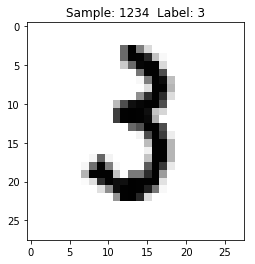

In [12]:
import matplotlib.pyplot as plt

def display_sample(num):
    
    print(train_labels[num])  
    
    label = train_labels[num].argmax(axis=0)
  
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

In [14]:
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation = 'relu' ,input_shape = (784,)),
    layers.Dense(10, activation = 'softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 11s - loss: 0.2397 - acc: 0.9298 - val_loss: 0.1126 - val_acc: 0.9652
Epoch 2/10
 - 10s - loss: 0.0967 - acc: 0.9716 - val_loss: 0.0863 - val_acc: 0.9735
Epoch 3/10
 - 10s - loss: 0.0650 - acc: 0.9805 - val_loss: 0.0730 - val_acc: 0.9780
Epoch 4/10
 - 9s - loss: 0.0461 - acc: 0.9862 - val_loss: 0.0656 - val_acc: 0.9809
Epoch 5/10
 - 9s - loss: 0.0345 - acc: 0.9897 - val_loss: 0.0621 - val_acc: 0.9816
Epoch 6/10
 - 9s - loss: 0.0274 - acc: 0.9919 - val_loss: 0.0616 - val_acc: 0.9807
Epoch 7/10
 - 9s - loss: 0.0202 - acc: 0.9939 - val_loss: 0.0736 - val_acc: 0.9784
Epoch 8/10
 - 10s - loss: 0.0156 - acc: 0.9957 - val_loss: 0.0812 - val_acc: 0.9787
Epoch 9/10
 - 9s - loss: 0.0124 - acc: 0.9966 - val_loss: 0.0765 - val_acc: 0.9799
Epoch 10/10
 - 10s - loss: 0.0096 - acc: 0.9972 - val_loss: 0.0703 - val_acc: 0.9825


In [18]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07028332361342564
Test accuracy: 0.9825


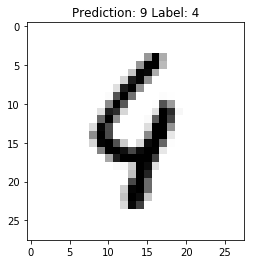

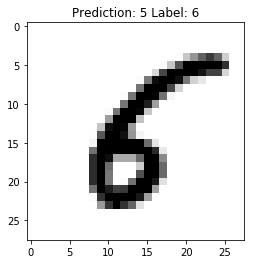

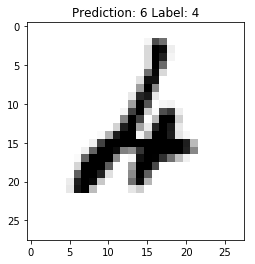

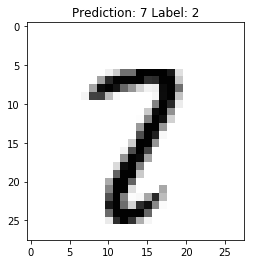

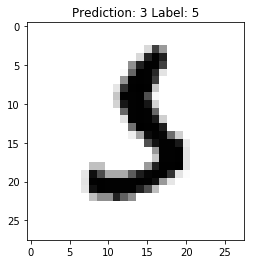

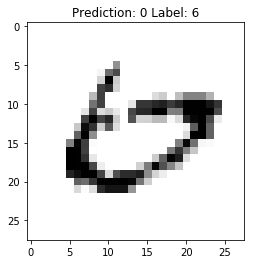

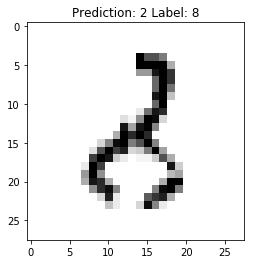

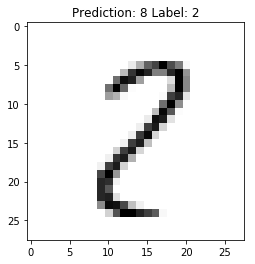

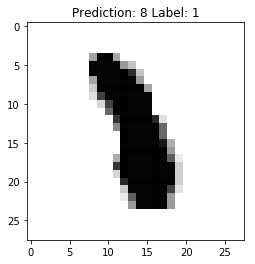

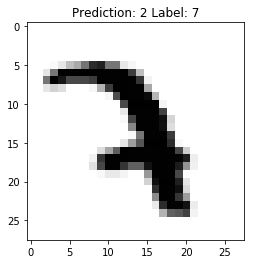

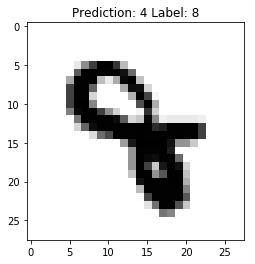

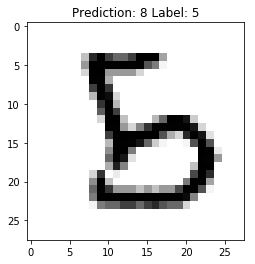

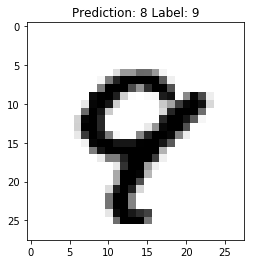

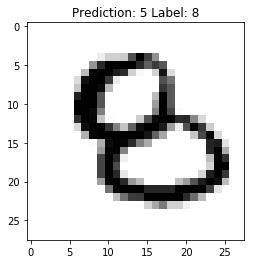

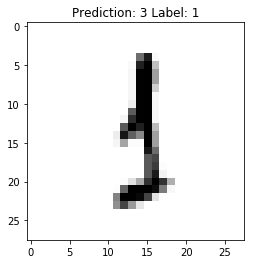

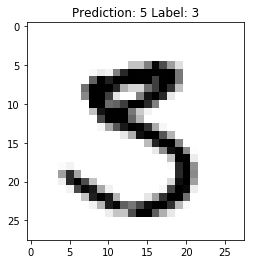

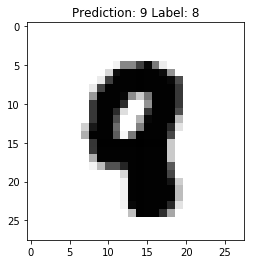

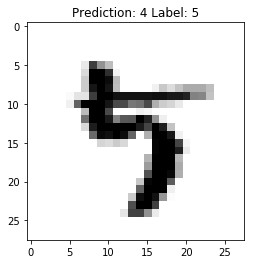

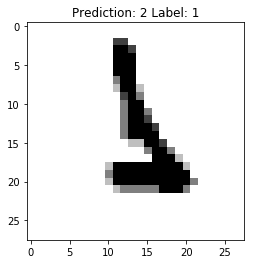

In [19]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()